In [1]:
import meep as mp
from meep import mpb
import numpy as np
from meep import mpb
from matplotlib import pyplot as plt
from IPython.display import Video
from meep.materials import Si

Using MPI version 3.1, 1 processes


In [2]:
W = 1.0 # Width of waveguide in microns
lambda_0 = 6.67

In [4]:
Si_lambda0 = mp.Medium(epsilon=np.real(Si.epsilon(1/lambda_0)[0,0]))

# Define the computational cell.  We'll make x the propagation direction.
# the other cell sizes should be big enough so that the boundaries are
# far away from the mode field.
sc_y = 2  # supercell width (um)
sc_z = 0  # supercell height (um)
geometry_lattice = mp.Lattice(size=mp.Vector3(0, sc_y, sc_z))

# define the 2d blocks for the strip and substrate
geometry = [mp.Block(size=mp.Vector3(mp.inf, W, mp.inf), material=Si_lambda0)]

resolution = 32  # pixels/um

num_bands = 1

ms = mpb.ModeSolver(
    geometry_lattice=geometry_lattice,
    geometry=geometry,
    resolution=resolution,
    num_bands=num_bands,
)

In [5]:
omega = 1 / lambda_0  # frequency corresponding to 1.55um

# Output the x component of the Poynting vector for num_bands bands at omega
k = ms.find_k(mp.NO_PARITY, omega, 1, num_bands, mp.Vector3(1), 1e-3, omega * 3.45,
          omega * 0.1, omega * 4)

Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 64 x 1.
Solving for 1 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 2, 0)
     (0, 0, 1)
Cell volume = 2
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.5, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
1 k-points
  Vector3<0.5172413793103449, 0.0, 0.0>
elapsed time for initialization: 0.0582122802734375
solve_kpoint (0.517241,0,0):
Solving for bands 1 to 1...
Finished solving for bands 1 to 1 after 15 iterations.
freqs:, 1, 0.517241, 0, 0, 0.517241, 0.175927
elapsed time for k point: 0.024785757064819336
total elaps

epsilon: 1-11.6934, mean 6.34668, harm. mean 1.88423, 51.5625% > 1, 50% "fill"


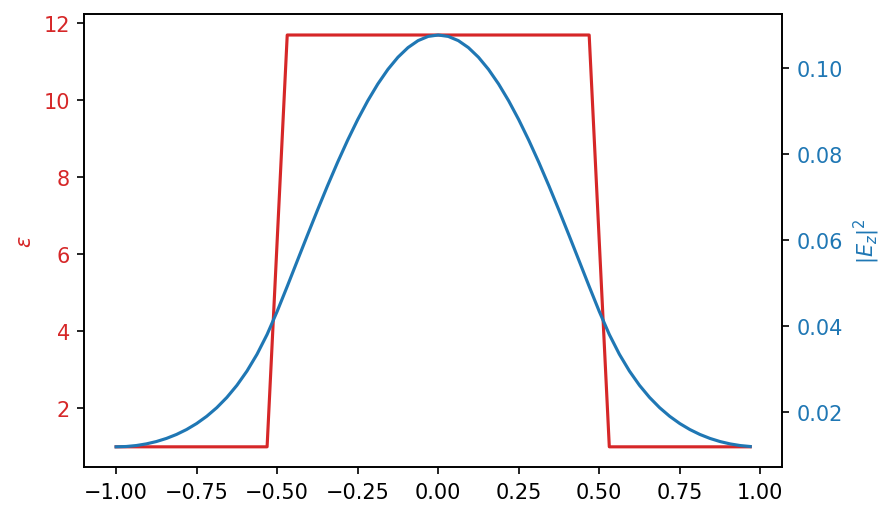

In [6]:
eps = ms.get_epsilon()
E = ms.get_efield(1)
H = ms.get_hfield(1)
fig, ax1 = plt.subplots(dpi=150)
x = np.arange(-sc_y/2,sc_y/2,1.0/resolution)

color = 'tab:red'
ax1.plot(x,eps, color=color)
ax1.set_ylabel('$\epsilon$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx() 
ax2.plot(x,np.abs(E[:,0,0,2])**2, color=color)
ax2.set_ylabel('$|E_{z}|^2$', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
plt.show()

In [11]:
omega = np.linspace(0,1.2,20)
k = []
num_bands = 1
for omi, om in enumerate(range(20)):
    k.append(ms.find_k(mp.NO_PARITY, om, 1, num_bands, mp.Vector3(1), 1e-3, om * 3.45,
          om * 0.1, om * 4))

Initializing fields to random numbers...
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 64 x 1.
Solving for 1 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 2, 0)
     (0, 0, 1)
Cell volume = 2
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.5, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.03361868858337402
solve_kpoint (0,0,0):
freqs:, 1, 0, 0, 0, 0, 0
elapsed time for k point: 0.004498720169067383
total elapsed time for run: 0.03840160369873047
done
find-k 1 at 0.0: 0.0
kvals:, 0, 1, 1, 0.0,

Solving for bands 1 to 1...
Finished solving for bands 1 to 1 after 68 iterations.
freqs:, 1, 13.8, 0, 0, 13.8, 4.03832
elapsed time for k point: 0.004259347915649414
total elapsed time for run: 0.01785755157470703
done
find-k 1 at 13.8: 0.03831621291435461
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 64 x 1.
Solving for 1 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 2, 0)
     (0, 0, 1)
Cell volume = 2
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.5, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: .
1 k-points
  Vector3<13.668889398477262, 0.0, 0.0>
elapsed time for initialization: 0.016797542572021484
solve_kpoint (13.6

Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: .
1 k-points
  Vector3<27.6, 0.0, 0.0>
elapsed time for initialization: 0.058648109436035156
solve_kpoint (27.6,0,0):
Solving for bands 1 to 1...
Finished solving for bands 1 to 1 after 120 iterations.
freqs:, 1, 27.6, 0, 0, 27.6, 8.07258
elapsed time for k point: 0.0056378841400146484
total elapsed time for run: 0.06438612937927246
done
find-k 1 at 27.6: 0.07258401356670596
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 64 x 1.
Solving for 1 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 2, 0)
     (0, 0, 1)
Cell volume = 2
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.5, -0)
     (0, -0, 1)
Geome

Grid size is 1 x 64 x 1.
Solving for 1 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 2, 0)
     (0, 0, 1)
Cell volume = 2
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.5, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: .
1 k-points
  Vector3<41.400000000000006, 0.0, 0.0>
elapsed time for initialization: 0.006910800933837891
solve_kpoint (41.4,0,0):
Solving for bands 1 to 1...
Finished solving for bands 1 to 1 after 121 iterations.
freqs:, 1, 41.4, 0, 0, 41.4, 12.1078
elapsed time for k point: 0.0056798458099365234
total elapsed time for run: 0.01269078254699707
done
find-k 1 at 41.400000000000006: 0.10776401989743079
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
Wo

freqs:, 1, 51.2907, 0, 0, 51.2907, 15
elapsed time for k point: 0.0019822120666503906
total elapsed time for run: 0.009226322174072266
done
find-k 1 at 51.2906892534083: -4.117774157208487e-07
kvals:, 15, 1, 1, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 51.29069066157544
Initializing fields to random numbers...
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 1 x 64 x 1.
Solving for 1 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 2, 0)
     (0, 0, 1)
Cell volume = 2
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.5, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: .
1 k-points
  Vector3<55.2, 0.0, 0.0>
elapsed time for initialization: 0.007009506

Geometric object tree has depth 1 and 3 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: .
1 k-points
  Vector3<64.96936847459264, 0.0, 0.0>
elapsed time for initialization: 0.008063077926635742
solve_kpoint (64.9694,0,0):
Solving for bands 1 to 1...
Finished solving for bands 1 to 1 after 1 iterations.
freqs:, 1, 64.9694, 0, 0, 64.9694, 19
elapsed time for k point: 0.0021462440490722656
total elapsed time for run: 0.010308027267456055
done
find-k 1 at 64.96936847459264: -4.587454256466117e-07
kvals:, 19, 1, 1, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 64.96937004334973


In [ ]:
neff = k[0]/omega
print("Effective index of fundamental TE mode: {:.3f} microns.".format(neff))
period0 = lambda_0 / (2*neff)
print("Corresponding stopband grating period: {:.3f} microns.".format(period0))